In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("onlineShopping.csv")

In [3]:
df

,Customer_ID,Age,Gender,Region,Total_Spent,No_of_Orders,Average_Order_Value,Payment_Method,Returning_Customer,Satisfaction_Rating
0,1,56,Female,East,1628.56,19,85.71,Debit Card,No,2
1,2,37,Female,South,1671.64,12,139.30,COD,Yes,4
2,3,22,Male,North,3649.67,18,202.76,UPI,No,3
3,4,18,Male,West,3754.60,6,625.77,Credit Card,Yes,3
4,5,47,Female,South,1081.76,18,60.10,COD,Yes,5
...,...,...,...,...,...,...,...,...,...,...
95,96,22,Male,South,1712.19,17,100.72,Credit Card,No,1
96,97,28,Female,East,2403.89,17,141.41,Credit Card,No,1
97,98,51,Female,North,3746.97,12,312.25,UPI,Yes,2
98,99,41,Male,North,4371.98,15,291.47,UPI,Yes,3


In [4]:
df.shape

(100, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          100 non-null    int64  
 1   Age                  100 non-null    int64  
 2   Gender               100 non-null    object 
 3   Region               100 non-null    object 
 4   Total_Spent          100 non-null    float64
 5   No_of_Orders         100 non-null    int64  
 6   Average_Order_Value  100 non-null    float64
 7   Payment_Method       100 non-null    object 
 8   Returning_Customer   100 non-null    object 
 9   Satisfaction_Rating  100 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


In [7]:
df.head()

,Customer_ID,Age,Gender,Region,Total_Spent,No_of_Orders,Average_Order_Value,Payment_Method,Returning_Customer,Satisfaction_Rating
0,1,56,Female,East,1628.56,19,85.71,Debit Card,No,2
1,2,37,Female,South,1671.64,12,139.30,COD,Yes,4
2,3,22,Male,North,3649.67,18,202.76,UPI,No,3
3,4,18,Male,West,3754.60,6,625.77,Credit Card,Yes,3
4,5,47,Female,South,1081.76,18,60.10,COD,Yes,5


In [8]:
df.isnull().sum()

Customer_ID            0
Age                    0
Gender                 0
Region                 0
Total_Spent            0
No_of_Orders           0
Average_Order_Value    0
Payment_Method         0
Returning_Customer     0
Satisfaction_Rating    0
dtype: int64

In [9]:
df.describe()

,Customer_ID,Age,Total_Spent,No_of_Orders,Average_Order_Value,Satisfaction_Rating
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,42.160000,2667.595500,9.600000,509.384000,3.080000
std,29.011492,15.883236,1366.372143,5.546862,642.872373,1.419062
min,1.000000,18.000000,106.040000,1.000000,11.030000,1.000000
25%,25.750000,27.750000,1612.495000,5.000000,193.610000,2.000000
50%,50.500000,42.000000,2846.850000,10.000000,285.230000,3.000000
75%,75.250000,56.000000,3675.480000,14.250000,624.015000,4.000000
max,100.000000,69.000000,4923.320000,19.000000,3809.590000,5.000000


How many customers are from each region?

In [10]:
df['Region'].value_counts()

Region
East     28
West     26
South    24
North    22
Name: count, dtype: int64

This accesses the Region column of the DataFrame.
 Value Count function counts the number of occurrences of each unique value in that column.

Create a histogram for Total Spent.

<Axes: xlabel='Total_Spent', ylabel='Count'>

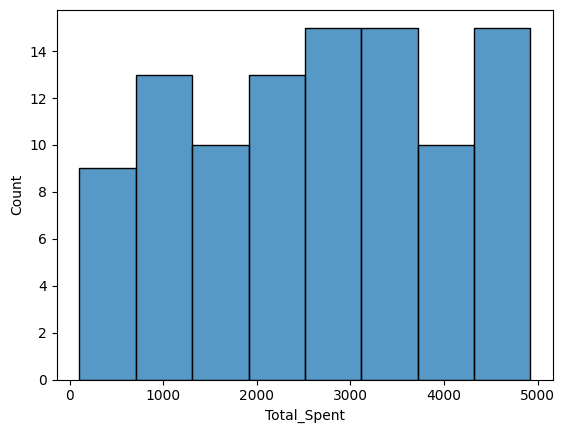

In [11]:
sns.histplot(data=df, x="Total_Spent")


This creates a histogram of the Total_Spent column using Seaborn to show the distribution of spending among customers.

Which gender spends more on average?

In [14]:
gender_summary = df.groupby("Gender")["Total_Spent"].describe()
print(gender_summary)

        count         mean          std     min      25%      50%      75%  \
Gender                                                                       
Female   49.0  2594.035510  1303.695394  106.04  1628.56  2836.22  3496.65   
Male     51.0  2738.270784  1433.377707  299.70  1609.84  2992.29  3854.83   

            max  
Gender           
Female  4923.32  
Male    4889.59  


To quickly compare how males and females differ in their total spending behavior.

Use a boxplot to compare Total Spent across Payment Methods.

<Axes: xlabel='Payment_Method', ylabel='Total_Spent'>

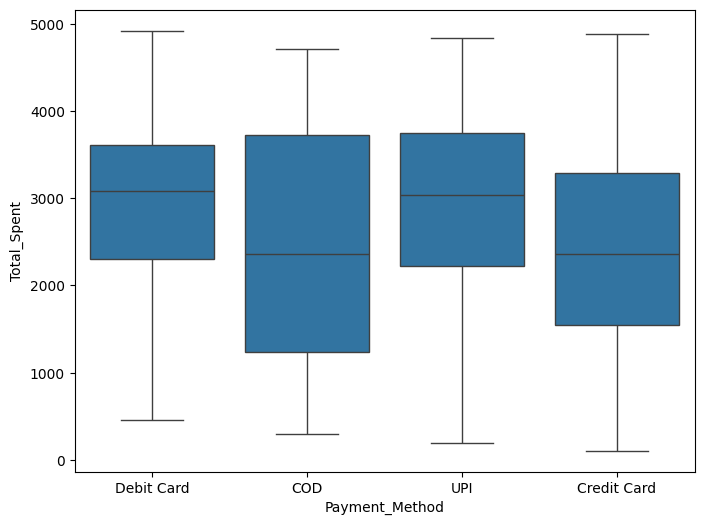

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Payment_Method', y='Total_Spent', data=df)

This creates a boxplot to visually compare the distribution of total spending (Total_Spent) across different payment methods.

Show a countplot of Returning vs New Customers.

<Axes: xlabel='Returning_Customer', ylabel='count'>

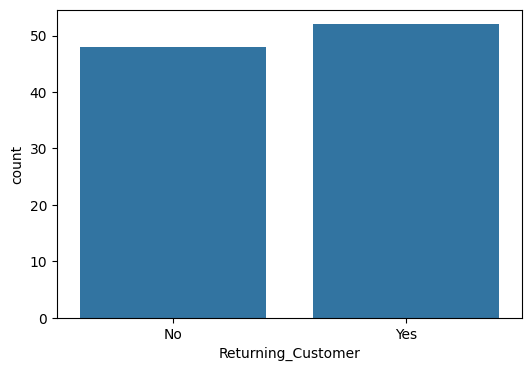

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Returning_Customer', data=df)

This creates a bar chart showing the number of returning vs. new customers.

What is the average order value by payment method?

In [21]:
avg_order_value = df.groupby('Payment_Method')['Total_Spent'].mean().reset_index()
avg_order_value

,Payment_Method,Total_Spent
0,COD,2448.523636
1,Credit Card,2458.357200
2,Debit Card,2852.302500
3,UPI,2862.745200


This calculates the average total amount spent by customers for each payment method.

Use scatter plot for No. of Orders vs Total Spent.

<Axes: xlabel='No_of_Orders', ylabel='Total_Spent'>

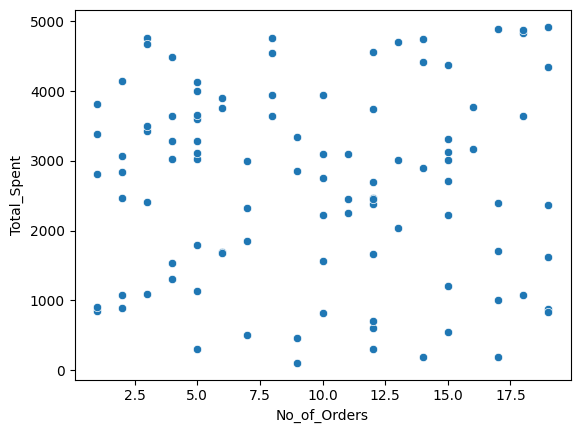

In [22]:
sns.scatterplot(x='No_of_Orders', y='Total_Spent', data=df)

This creates a scatter plot to show the relationship between number of orders and total spending for each customer.

What is the distribution of Satisfaction Ratings?

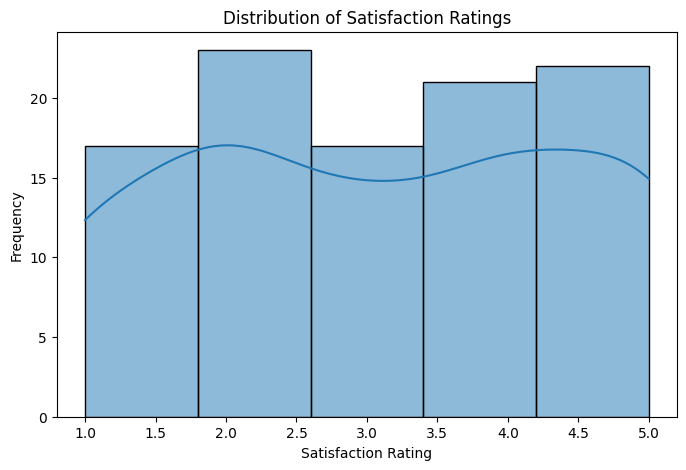

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Satisfaction_Rating'], bins=5, kde=True)

plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')

plt.show()

This draws a histogram with a smooth density curve (KDE) to visualize how customer satisfaction ratings are distributed.

Use heatmap to find correlations between numeric columns.

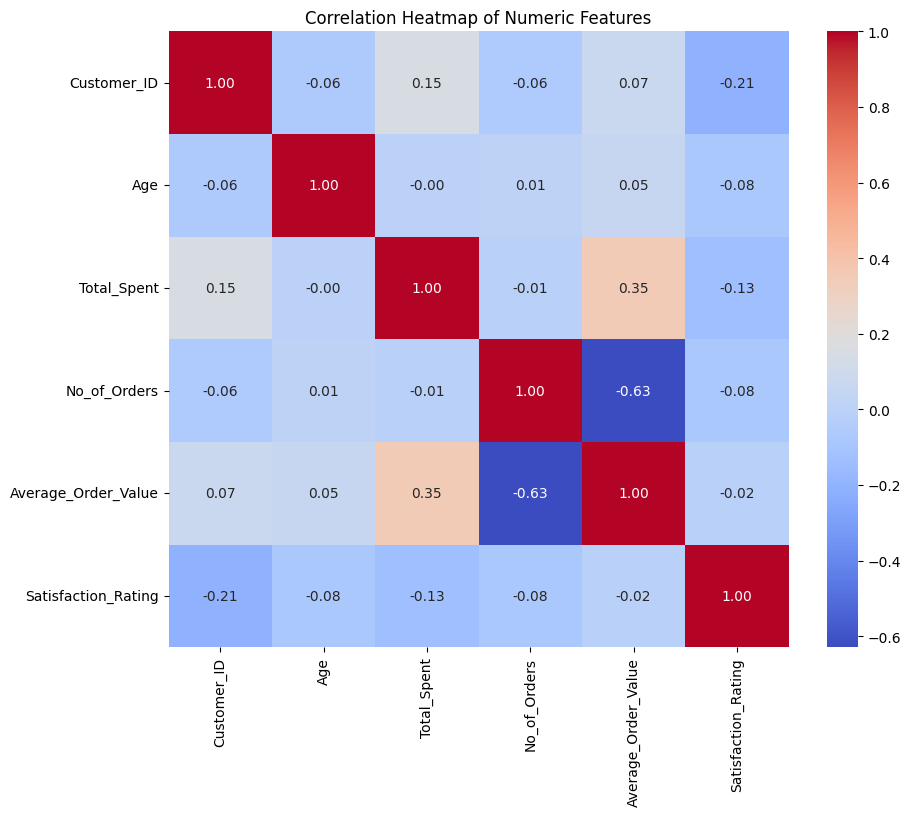

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

This code generates a correlation heatmap to show how strongly numeric features (like age, total spent, number of orders) are related to each other.

Plot average total spent by age group buckets.

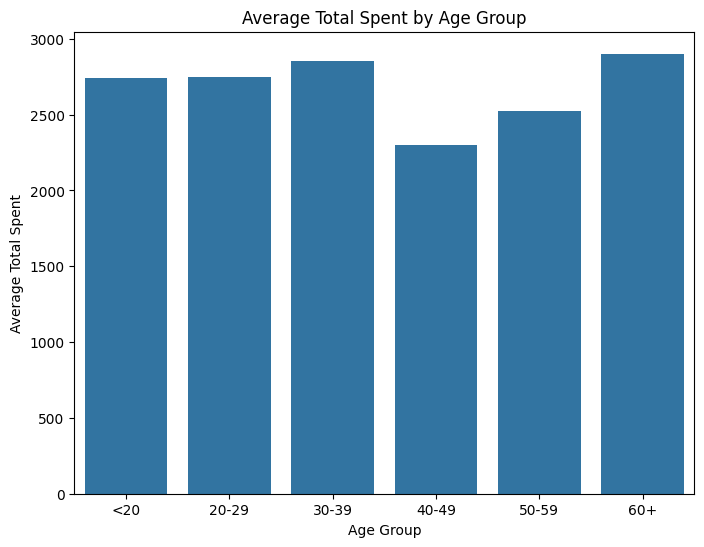

In [12]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate average total spent by age group
avg_spent_by_age_group = df.groupby('Age_Group')['Total_Spent'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_spent_by_age_group, x='Age_Group', y='Total_Spent')
plt.title("Average Total Spent by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Spent")
plt.show()

This code groups customers into age brackets and plots a bar chart showing the average total spent in each group.

Which region has the highest average satisfaction rating?

In [13]:
avg_satisfaction_by_region = df.groupby('Region')['Satisfaction_Rating'].mean().reset_index()


highest_satisfaction_region = avg_satisfaction_by_region.loc[avg_satisfaction_by_region['Satisfaction_Rating'].idxmax()]

print("Average satisfaction rating by region:")
print(avg_satisfaction_by_region)
print("\nRegion with the highest average satisfaction rating:")
print(highest_satisfaction_region)

Average satisfaction rating by region:
  Region  Satisfaction_Rating
0   East             3.214286
1  North             3.090909
2  South             2.583333
3   West             3.384615

Region with the highest average satisfaction rating:
Region                     West
Satisfaction_Rating    3.384615
Name: 3, dtype: object


It  identifies the region with the highest average satisfaction rating and prints both the average ratings by region and the top-performing region.

Create a pie chart of Payment Method distribution.

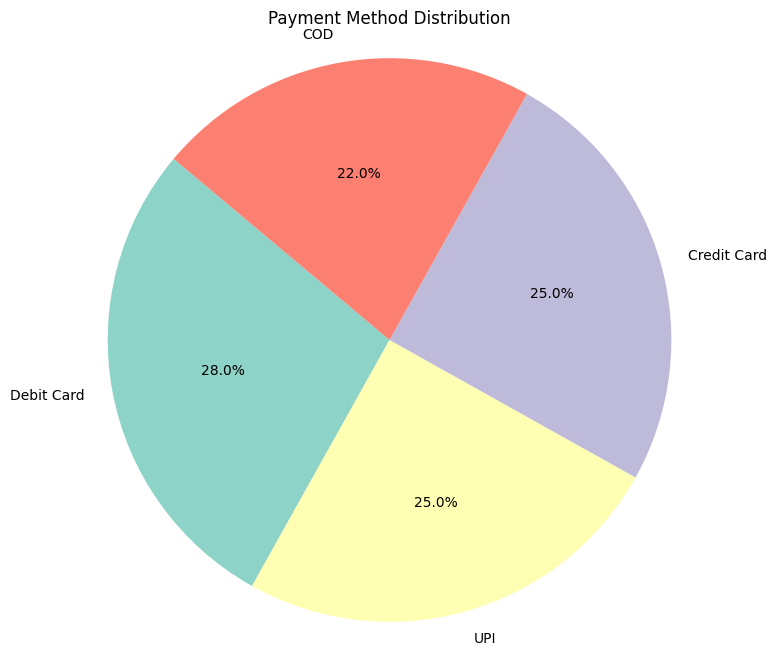

In [15]:
payment_counts = df['Payment_Method'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Payment Method Distribution")
plt.axis('equal')  
plt.show()

This code counts the number of occurrences for each payment method in the Payment_Method column of the DataFrame df. It then creates a pie chart to visualize the distribution of payment methods, showing the percentage share of each method with labels and colors for clarity. 

Find the customer with the highest total spend.

In [16]:
highest_spender = df.loc[df['Total_Spent'].idxmax()]

print("Customer with the highest total spend:")
print(highest_spender)

Customer with the highest total spend:
Customer_ID                    35
Age                            51
Gender                     Female
Region                      South
Total_Spent               4923.32
No_of_Orders                   19
Average_Order_Value        259.12
Payment_Method         Debit Card
Returning_Customer             No
Satisfaction_Rating             1
Age_Group                   50-59
Name: 34, dtype: object


This code finds the customer who spent the most by locating the row in the DataFrame df where the Total_Spent value is the highest (idxmax() returns the index of that max value). It then prints the details of that customer with the highest total spending.

Compare the number of orders between new and returning customers.

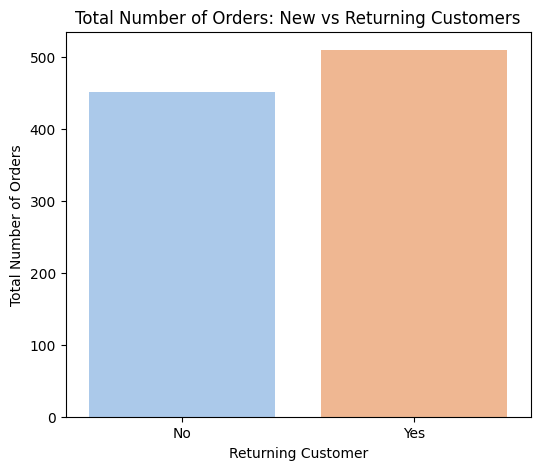

  Returning_Customer  No_of_Orders
0                 No           451
1                Yes           509


In [18]:
order_comparison = df.groupby('Returning_Customer')['No_of_Orders'].sum().reset_index()


plt.figure(figsize=(6, 5))
sns.barplot(data=order_comparison, x='Returning_Customer', y='No_of_Orders', palette='pastel')
plt.title("Total Number of Orders: New vs Returning Customers")
plt.xlabel("Returning Customer")
plt.ylabel("Total Number of Orders")
plt.show()


print(order_comparison)

This code groups the data by the Returning_Customer status and sums up the total number of orders (No_of_Orders) for each group (New vs Returning customers). 

Plot bar chart of Total Spent across gender and region using hue.

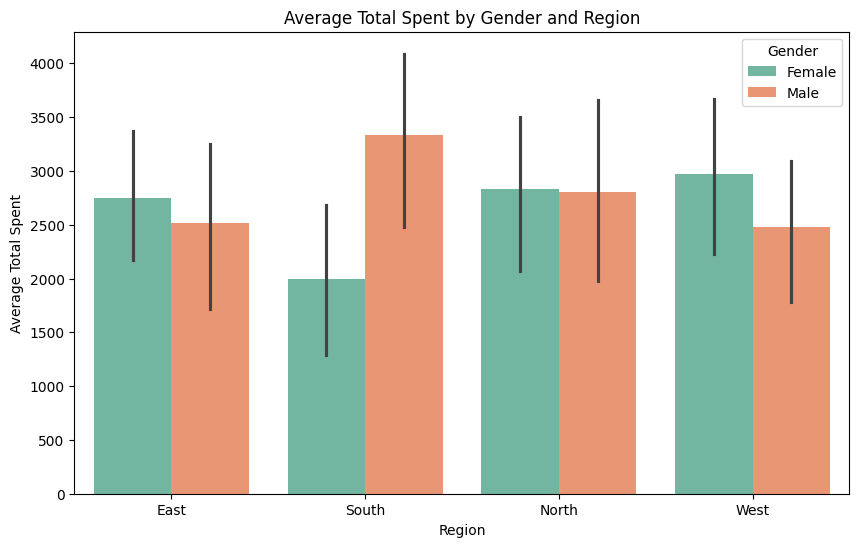

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Total_Spent', hue='Gender', estimator='mean', palette='Set2')
plt.title("Average Total Spent by Gender and Region")
plt.xlabel("Region")
plt.ylabel("Average Total Spent")
plt.legend(title='Gender')
plt.show()

This code creates a bar plot that shows the average total spent across different regions, separated by gender. It groups the data by Region and Gender, calculates the mean Total_Spent for each group, and visualizes the comparison with different colors for genders.